# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

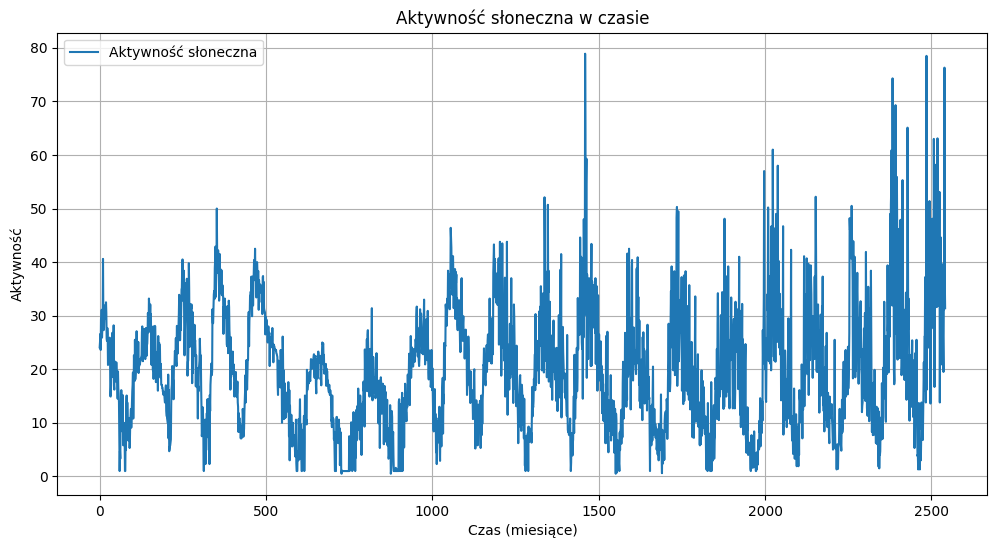

In [129]:

import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych z pliku
data_file = 'spots.txt'
array = [float(x) for x in open(data_file).read().split()]

# Konwersja na tablicę NumPy dla wygody
signal = np.array(array)
n = len(signal)  # liczba próbek

# Wektory czasu (zakładamy, że próbkowanie jest co 1 miesiąc)
t = np.arange(n)  # miesiące

# Wykreślenie sygnału
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Aktywność słoneczna')
plt.title('Aktywność słoneczna w czasie')
plt.xlabel('Czas (miesiące)')
plt.ylabel('Aktywność')
plt.legend()
plt.grid()
plt.show()


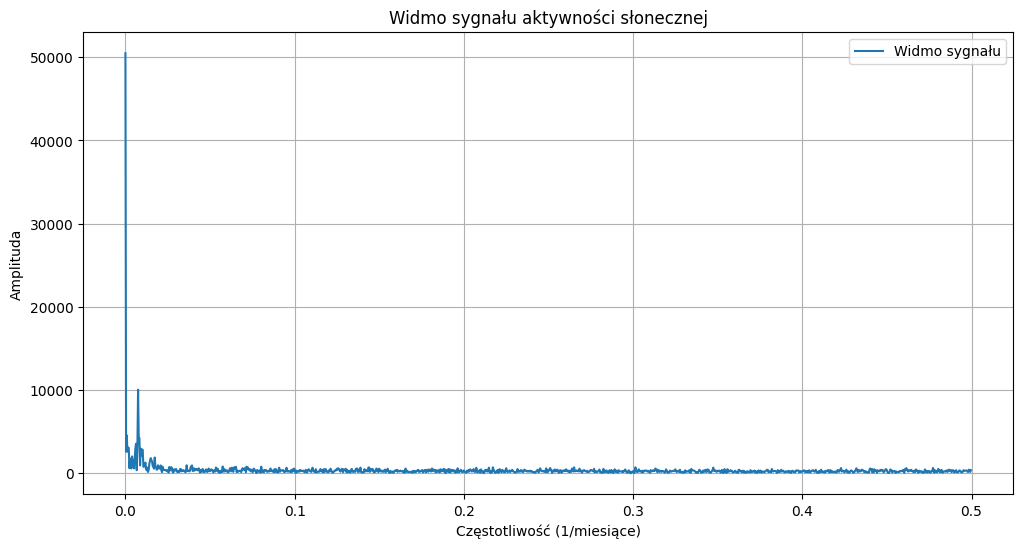

Dominująca częstotliwość: 0.0075 1/miesiące
Dominująca częstotliwość: 0.000000002884 Hz
Okres cyklu aktywności słonecznej: 133.79 miesiące


In [130]:
# Obliczenie FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n, d=1)  # d=1 -> odstęp czasowy w miesiącach

# Amplituda (moduł FFT)
amplitude = np.abs(fft_result)[:n // 2]  # pierwsza połowa (dla częstotliwości dodatnich)
frequencies_positive = frequencies[:n // 2]

# Wykreślenie widma
plt.figure(figsize=(12, 6))
plt.plot(frequencies_positive, amplitude, label='Widmo sygnału')
plt.title('Widmo sygnału aktywności słonecznej')
plt.xlabel('Częstotliwość (1/miesiące)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

# Znalezienie dominującej częstotliwości
peak_index = np.argmax(amplitude[1:]) + 1  # pomijamy częstotliwość zerową (stała składowa)
dominant_frequency = frequencies_positive[peak_index]
dominant_frequency_Hz = dominant_frequency/(30*24*60*60)

# Okres cyklu aktywności słonecznej
cycle_period_months = 1 / dominant_frequency

print(f'Dominująca częstotliwość: {dominant_frequency:.4f} 1/miesiące')
print(f'Dominująca częstotliwość: {dominant_frequency_Hz:.12f} Hz')
print(f'Okres cyklu aktywności słonecznej: {cycle_period_months:.2f} miesiące')

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

In [131]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
from scipy.fft import fft
%matplotlib inline

def ScriptToFunction(A=1, LP=1, w=40, f=2.0):
    
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t) + sin(4*pi*t)
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()
    
    
    # Usuwanie składowych o częstotliwości 2 Hz
    signal_fft = fft(signal)
    signal_fft[2] = 0
    signal_fft[-2] = 0

    # Przekształcenie z powrotem do dziedziny czasu
    filtered_signal = np.fft.ifft(signal_fft)

    # Wykreślenie zmodyfikowanego sygnału
    fig_filtered = plt.figure(figsize=(12, 6))
    ax_filtered = fig_filtered.add_subplot(111)
    ax_filtered.plot(t, filtered_signal, label='Sygnał po usunięciu 2 Hz', color='blue')
    ax_filtered.set_title('Zmodyfikowany sygnał w dziedzinie czasu')
    ax_filtered.set_xlabel('Czas [s]')
    ax_filtered.set_ylabel('Amplituda')
    ax_filtered.legend()
    ax_filtered.grid()
    plt.show()

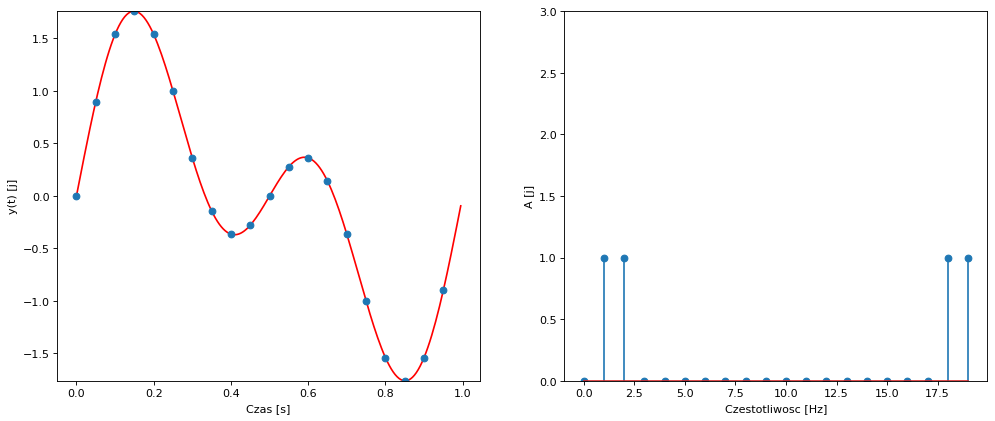

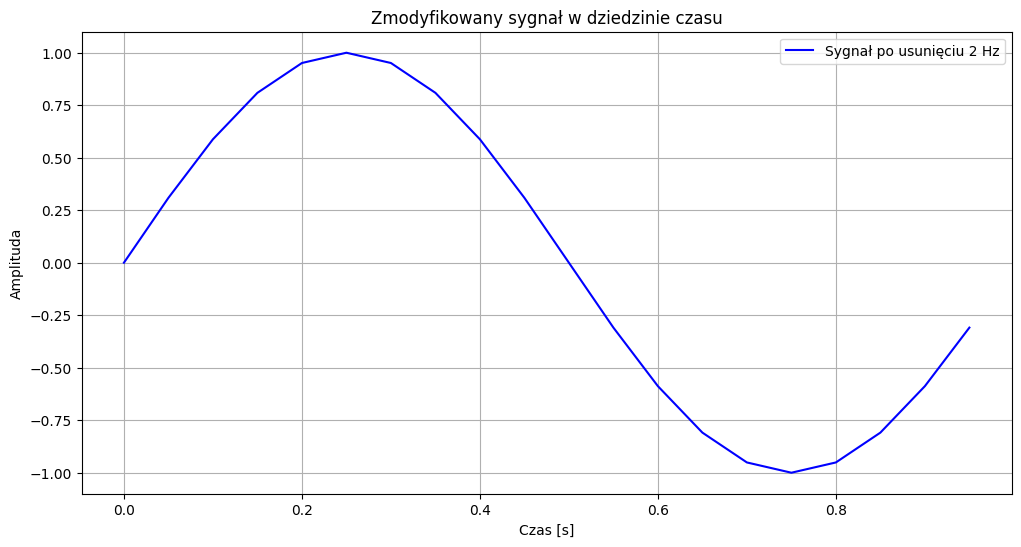

In [132]:
ScriptToFunction(A = 1, w = 20, f = 1)

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

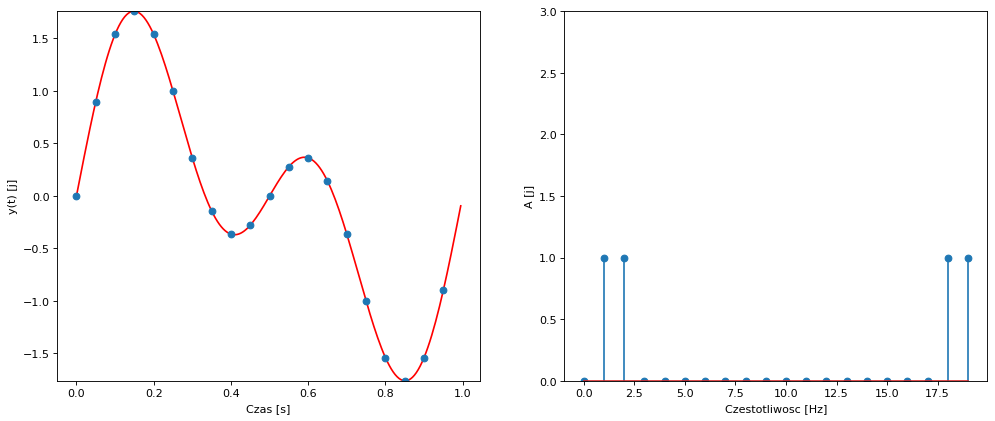

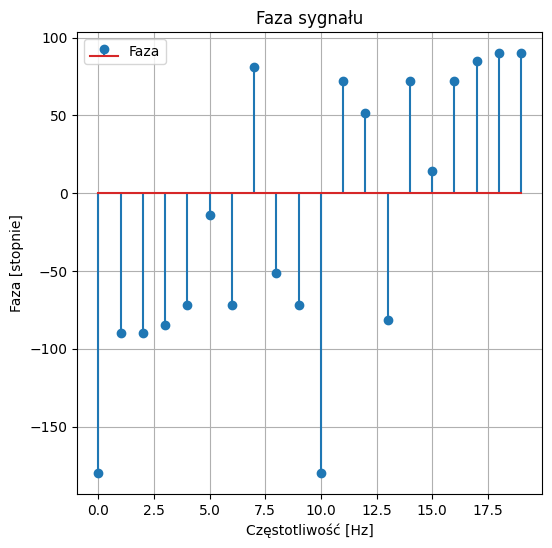

In [133]:
def ScriptToFunction(A=1, LP=1, w=40, f=2.0):
    
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t) + sin(4*pi*t)
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()
    
    phase = np.angle(fft(signal), deg=True)
    
    fig = plt.figure(figsize=(6, 6))
    plt.stem(freqs, phase, label='Faza')
    plt.title('Faza sygnału')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Faza [stopnie]')
    plt.legend()
    plt.grid()
    plt.show()
    
    
ScriptToFunction(w = 20, f = 1)

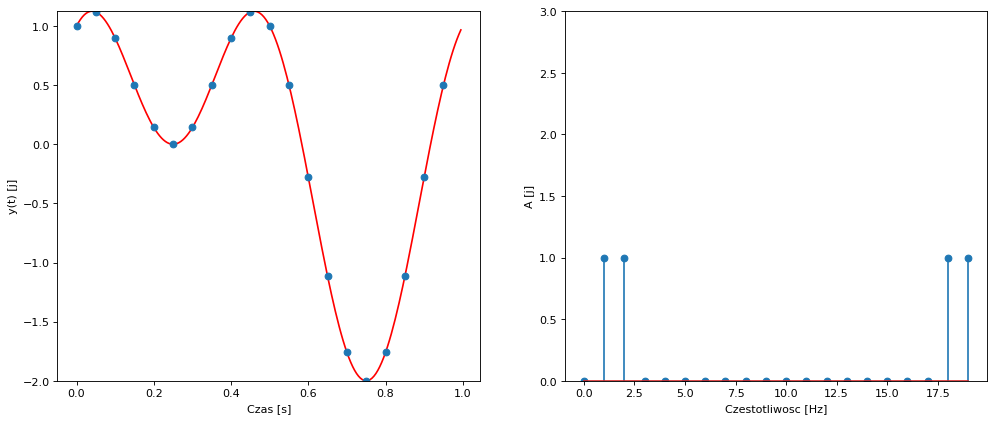

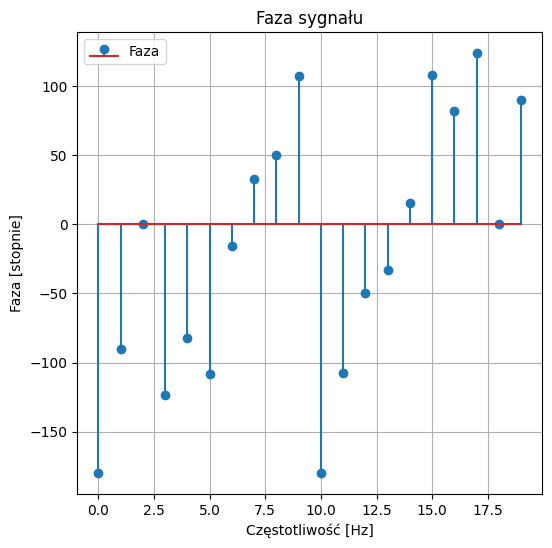

In [134]:
def ScriptToFunctionCos(A=1, LP=1, w=40, f=2.0):
    
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t) + A*cos(4*pi*t)
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    plt.xlabel('Czas [s]')
    plt.ylabel('y(t) [j]')

    signal1 = fft(signal)/(n/2)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = arange(n)/n*w


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.ylabel('A [j]')
    plt.xlabel('Czestotliwosc [Hz]')
    show()
    phase = np.angle(fft(signal), deg=True)
    
    fig = plt.figure(figsize=(6, 6))
    plt.stem(freqs, phase, label='Faza')
    plt.title('Faza sygnału')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Faza [stopnie]')
    plt.legend()
    plt.grid()
    plt.show()
    
    
ScriptToFunctionCos(w = 20, f = 1)



# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


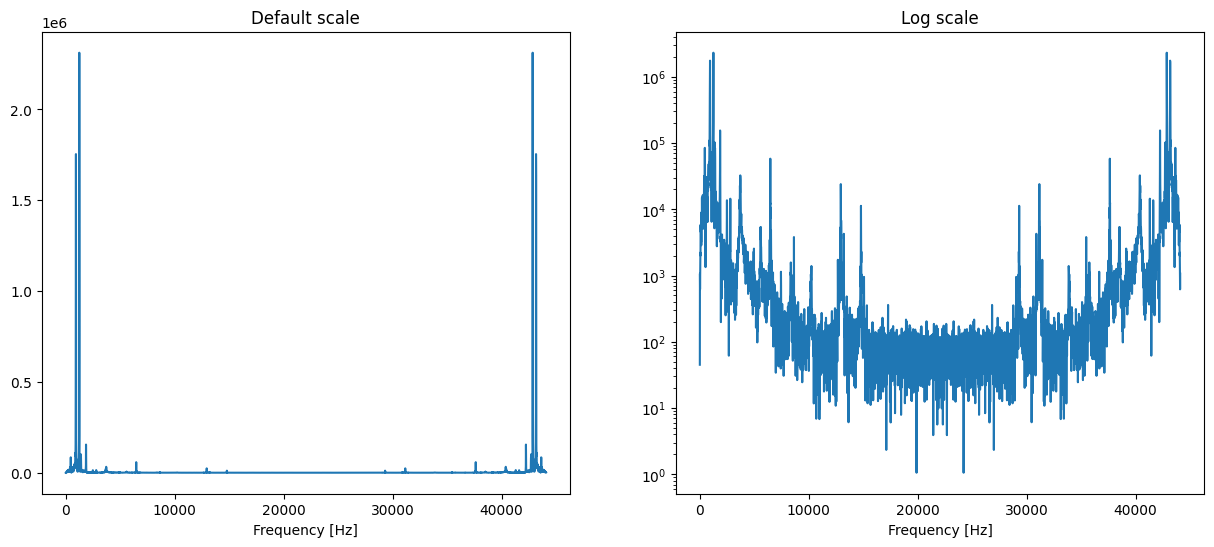

[  924.57789179   925.60634328   928.69169776   929.72014925
   930.74860075   931.77705224   932.80550373   934.86240672
   935.89085821  1240.3125      1241.34095149  1242.36940299
  1243.39785448  1244.42630597 42855.57369403 42856.60214552
 42857.63059701 42858.65904851 42859.6875     43164.10914179
 43165.13759328 43167.19449627 43168.22294776 43169.25139925
 43170.27985075 43171.30830224 43174.39365672 43175.42210821]


In [146]:
import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal] #Tylko pierwszy kanał
signal1 = np.abs(fft(signal))
n = len(signal)
freqs = arange(n)/n*w

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Default scale')
plt.xlabel('Frequency [Hz]')
plt.plot(freqs[::10], signal1[::10])

plt.subplot(1, 2, 2)
plt.title('Log scale')
plt.xlabel('Frequency [Hz]')
plt.plot(freqs[::10], signal1[::10])
plt.yscale('log')

plt.show()

dominant_frequency = freqs[signal1 > 1.5e6]
print(dominant_frequency)